Write a python function that takes as input two numeric lists and returns the value of the
correlation between the two lists. Use the data shown below to test your function. The value of the
correlation function for this data is 0.5298

Place this function in your library of functions when you completed it. Also after you gotten your
correlation function to work, create a generic xy plot function that can plot the data as either a scatter plot
or an xy plot that draw a line between the data points. Place the plotting function in your function library.
This will give a feel for how a correlation value corresponds to what you see in the scatterplot.

* X  Y
* 43 99
* 21 65
* 25 79
* 42 75
* 57 87
* 59 81

function for graphing 2 lists of data as scatter or line

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def correlation(list1, list2):
    x_sum = 0
    y_sum = 0
    e1 = 0
    x_sq = 0
    y_sq = 0
    
    for num in range(len(list1)):
        x_sum += list1[num]
        y_sum += list2[num]
        e1+=  list1[num]*list2[num]
        x_sq += list1[num]**2
        y_sq += list2[num]**2
    
    e1= e1* len(list1)
    
    x_sq_sub = (x_sq *len(list1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(list2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr

def scatter_plot(x_list, y_list, color='blue', point='o'):
    plt.scatter(x_list, y_list, c=color, marker=point)
    plt.show()
    
def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
    else:
        plt.plot(x_list, y_list, color=colour, marker=mark, linestyle=line)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def slope_to_points(slope, intercept, point_nums):
    list_x = []
    list_y = []
    for num in point_nums:
        list_x.append(num)
        y_point = slope * num + intercept
        list_y.append(y_point)
    return list_x, list_y

0.5298089018901744


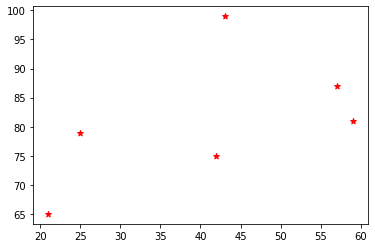

In [3]:
xs = [43,21,25,42,57,59]
ys = [99,65,79,75,87,81]

corre = correlation(xs,ys)
print(corre)

scatter_plot(xs,ys,'red', "*")
# line_graph(xs,ys)
# line_graph([[1,2,3],[1,2,3]], [[2,3,4], [1,3,5]], amount=2, colour=['red', 'blue'], mark=['o', "*"], line=["-", "--"]) #TEST, NOT RELATED TO THE ASSIGNMENT

Seen above, the line correlatin is 0.5
The scatter plot above is a representation of the gathered data.

Write a function that takes as input two lists of numeric data and computes the least squares coefficients for a linear fit of the data. You will be provided with two python functions. mat_inv will return the inverted the least squares matrix and get_coeffs will return the least squares coefficients for the fit. Use the data below to test your function. Read the documentation for the functions on the next slide in order to understand how the functions should be invoked from your program. Place your final function in your library. Write a separate function that calls the least squares computation function and takes as input 2 lists of data, a string for the x-axis label, a string for the y-axis label, a string for the title, and a flag that indicates whether a linear or quadratic fit is to be performed. The function should plot the data using a scatterplot and plot a line showing the function corresponding to the Least Squares fit for the data.

For the linear regression function, we are going to be using the Numpy library to make our lives a little easier.  After you've found the necessary values to be placed into the A and B matrices you need to convert the A and B matrices into Numpy arrays.  Just pass your matrices into np.array(your_list) then use np.linalg.inv(A) to find the inverse of matrix A.  Finally because you are working with Numpy arrays now using regular multiplication won't work, you need to use Numpy's dot method, so np.dot(inv_A, B), this will return an array with the slope at index 0 and the y-intercept at index 1.
* X Y
* 2 4
* 3 5
* 5 7
* 7 10
* 9 15


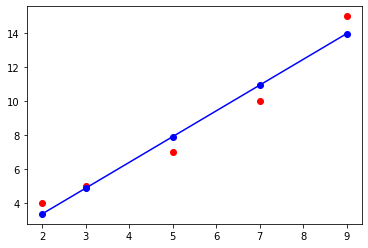

In [4]:
xlist = [2,3,5,7,9]
ylist = [4,5,7,10,15]

def det(A):
    answer = (A[0][0] * A[1][1]) - (A[0][1] * A[1][0])
    return answer

def mat(list1, list2):
    x_sq = 0
    x_sum = 0
    xy_sum = 0
    y_sum = 0
    
    for num in range(len(list1)):
        x_sq += list1[num]**2
        x_sum += list1[num]
        xy_sum += list1[num] * list2[num]
        y_sum += list2[num]
        
    A = [[x_sq, x_sum], [x_sum, len(list1)]]
    B = [xy_sum, y_sum]
    
    array_reg = np.array(A)
    array_inverse = np.linalg.inv(array_reg)
    answer = np.dot(array_inverse, B)
    return answer
least_square_line = mat(xlist,ylist)
x_list2, y_list2 = slope_to_points(list(least_square_line)[0], list(least_square_line)[1], xlist)
line_graph(x_list=[xlist, x_list2], y_list=[ylist,y_list2], amount=2, colour=['red', 'blue'], mark=['o','o'], line=[" ", "-"])